<a href="https://colab.research.google.com/github/KhotNoorin/Deep-Learning/blob/main/Types_of_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# RNN Input-Output Architecture Types

Recurrent Neural Networks (RNNs) can be categorized based on the format of their input and output sequences. These configurations determine how the model handles different types of sequence data.

---

## 1. One-to-One
- **Description:** Standard neural network (not truly RNN).
- **Input:** Single data point.
- **Output:** Single prediction.
- **Example:** Image classification.

**Diagram:**

[Input] → [NN] → [Output]

---

## 2. One-to-Many
- **Description:** Single input leading to a sequence of outputs.
- **Input:** One data point.
- **Output:** Sequence.
- **Example:** Music generation, image captioning.

**Diagram:**

[Input] → [RNN] → [Output₁ → Output₂ → Output₃ → ...]

---

## 3. Many-to-One
- **Description:** Sequence of inputs results in a single output.
- **Input:** Sequence.
- **Output:** One data point.
- **Example:** Sentiment analysis, spam detection.

**Diagram:**

[Input₁ → Input₂ → Input₃ → ...] → [RNN] → [Output]

---

## 4. Many-to-Many (Equal Length)
- **Description:** Input and output are sequences of the same length.
- **Input:** Sequence.
- **Output:** Sequence.
- **Example:** Part-of-speech tagging, named entity recognition.

**Diagram:**

[Input₁ → Input₂ → Input₃] → [RNN] → [Output₁ → Output₂ → Output₃]

---

## 5. Many-to-Many (Different Lengths)
- **Description:** Sequence input and sequence output of different lengths, usually with encoder-decoder architecture.
- **Input:** Sequence.
- **Output:** Sequence (length may differ).
- **Example:** Machine translation, text summarization.

**Diagram:**

[Encoder RNN: Input₁ → Input₂ → ...] → [Context Vector] → [Decoder RNN: Output₁ → Output₂ → ...]

---

## Summary Table

| Architecture         | Input Type | Output Type | Applications                   |
|----------------------|------------|-------------|--------------------------------|
| One-to-One           | Single     | Single      | Image classification           |
| One-to-Many          | Single     | Sequence    | Image captioning, music gen.   |
| Many-to-One          | Sequence   | Single      | Sentiment analysis             |
| Many-to-Many (Equal) | Sequence   | Sequence    | POS tagging, NER               |
| Many-to-Many (Diff)  | Sequence   | Sequence    | Machine translation, chatbot   |

Each type is selected based on the problem's input-output structure. Choosing the right architecture is crucial for building an effective model.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, TimeDistributed, RepeatVector
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score

In [2]:
np.random.seed(42)
tf.random.set_seed(42)

# 1. One-to-One

In [3]:
# One-to-One: Input is a single number, output is a label
X = np.random.rand(1000, 1)
y = (X > 0.5).astype(int)

model_1 = Sequential([
    Dense(8, activation='relu', input_shape=(1,)),
    Dense(1, activation='sigmoid')
])
model_1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history_1 = model_1.fit(X, y, epochs=10, verbose=0)
acc_1 = history_1.history['accuracy'][-1]

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# 2. One-to-Many

In [4]:
# One-to-Many: Input a single number, output a sequence (like [x, x+1, x+2])
X = np.random.rand(1000, 1)
y = np.array([[[x+1], [x+2], [x+3]] for x in X[:, 0]])

model_2 = Sequential([
    Dense(8, activation='relu', input_shape=(1,)),
    RepeatVector(3),
    SimpleRNN(10, return_sequences=True),
    TimeDistributed(Dense(1))
])
model_2.compile(optimizer='adam', loss='mse')
history_2 = model_2.fit(X, y, epochs=10, verbose=0)
loss_2 = history_2.history['loss'][-1]

# 3. Many-to-One

In [5]:
# Many-to-One: Sequence input, output is sum (classification: sum > 2.5)
X = np.random.rand(1000, 5, 1)
y = (np.sum(X, axis=1) > 2.5).astype(int)

model_3 = Sequential([
    SimpleRNN(10, input_shape=(5, 1)),
    Dense(1, activation='sigmoid')
])
model_3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history_3 = model_3.fit(X, y, epochs=10, verbose=0)
acc_3 = history_3.history['accuracy'][-1]

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


# 4. Many-to-Many

In [6]:
# Many-to-Many: Each time step is doubled (y = 2 * x)
X = np.random.rand(1000, 5, 1)
y = 2 * X

model_4 = Sequential([
    SimpleRNN(10, return_sequences=True, input_shape=(5, 1)),
    TimeDistributed(Dense(1))
])
model_4.compile(optimizer='adam', loss='mse')
history_4 = model_4.fit(X, y, epochs=10, verbose=0)
loss_4 = history_4.history['loss'][-1]

# Comparison and Plotting

In [7]:
# Collect results
labels = ['One-to-One (Accuracy)', 'One-to-Many (Loss)', 'Many-to-One (Accuracy)', 'Many-to-Many (Loss)']
values = [acc_1, loss_2, acc_3, loss_4]

In [8]:
# Normalize losses for plotting
normalized_values = [acc_1, 1-loss_2, acc_3, 1-loss_4]

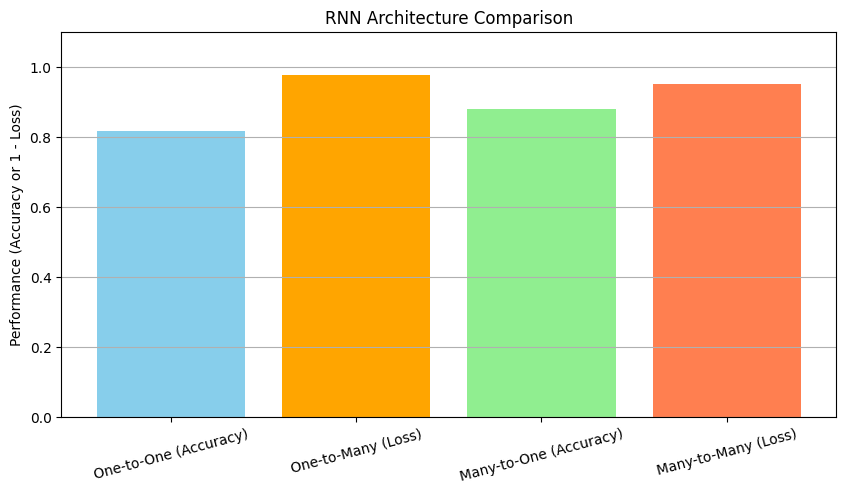

In [9]:
# Plot
plt.figure(figsize=(10, 5))
plt.bar(labels, normalized_values, color=['skyblue', 'orange', 'lightgreen', 'coral'])
plt.ylabel('Performance (Accuracy or 1 - Loss)')
plt.title('RNN Architecture Comparison')
plt.xticks(rotation=15)
plt.ylim(0, 1.1)
plt.grid(axis='y')
plt.show()